In [1]:
import os
os.chdir("../results/Nominal")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#outline key constraints
line_width = 2.5
font_size_axis_labels = 16
font_size_title = 16
font_size_ticks = 14
line_width_axis = 2.0

plot_title = "Nominal Operation"

model_files = [
    "40_chirps_chamfer_RadarHD.npy",
    "40_chirps_hausdorff_RadarHD.npy",
    "20_frames_chamfer_RadarHD.npy",
    "20_frames_hausdorff_RadarHD.npy",
    "40_frames_chamfer_RadarHD.npy",
    "40_frames_hausdorff_RadarHD.npy"
]

labels = [
    "cham. RadCloud",
    "mhaus. RadCloud",
    "cham. 20 frames",
    "mhaus. 20 frames",
    "cham. 40 frames",
    "mhaus. 40 frames "
]

#colors
colors = ["red","green","blue"]
line_styles = ["solid","dashed"]

In [3]:
#define plotting functions

def plot_cdf(
    ax:plt.Axes,
    distances:np.ndarray,
    label:str,
    color = "red",
    linestyle = "solid",
    title = "Error Comparison",
    show=True,
    percentile = 1.0):

    if not ax:
        fig = plt.figure(figsize=(3,3))
        ax = fig.add_subplot()

    sorted_data = np.sort(distances)
    p = 1. * np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

    #compute the index of the percentile
    idx = (np.abs(p - percentile)).argmin()

    plt.plot(sorted_data[:idx],p[:idx],
                label=label,
                linewidth=line_width,
                linestyle = linestyle,
                color=color)

    ax.set_xlabel('Error (m)',fontsize=font_size_axis_labels)
    ax.set_ylabel('CDF',fontsize=font_size_axis_labels)
    ax.set_title(title,fontsize=font_size_title)
    ax.set_xlim((0,2))

    if show:
        plt.grid()
        plt.legend()
        plt.show()


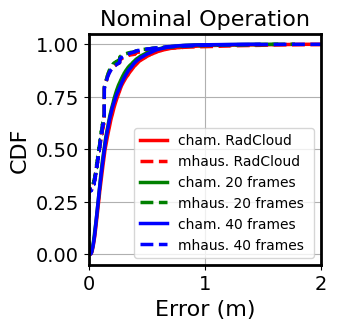

In [4]:
#create the axis

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()

for i in range(len(model_files)):

    plot_cdf(
        ax = ax,
        distances= np.load(model_files[i]),
        label=labels[i],
        color= colors[i//2],
        linestyle=line_styles[i % 2],
        title=plot_title,
        show=False,
        percentile=1.0
    )

ax.tick_params(labelsize=font_size_ticks)

#set the line width
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width_axis) # change width

plt.grid()
plt.legend()
plt.show()